In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import joblib

plt.style.use("fivethirtyeight")

In [34]:
class Perceptron:
    def __init__(self, eta: float = None, epochs: int = None):
        self.weights = np.random.randn(3)*1e-4
        self.eta = eta # learning rate
        self.epochs = epochs # iterations
    
    def activation_function(self, z):
        return np.where(z >= 0, 1, 0)

    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def fit(self, X, y): 
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            
            #Error calculation
            self.error = self.y - y_hat
            
            #Weight Update Rule
            self.weights = self.weights + self.eta* np.dot(X_with_bias.T, self.error)
   
    def predict(self, X):
        
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights) 
        #self.weights will get the updated weights after the epochs are exhausted
        
        return self.activation_function(z)
        

In [35]:
#Initialization of the OR GATE

OR={
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y"  : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [36]:
def prepare_data(df, target_col = "y"):
    X = df.drop(target_col, axis = 1)
    y = df[target_col]
    
    return X, y

In [37]:
X, y = prepare_data(df_OR)

ETA = 0.1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs= EPOCHS)


In [38]:
model_or.fit(X,y)

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


In [39]:
model_or.predict(X)

array([0, 1, 1, 1])

In [48]:
model_or.predict(X=[[0,0]])

array([0])

In [128]:
#Initialization of the XOR GATE

XOR={
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y"  : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [137]:
X, y = prepare_data(df_XOR)

ETA= 0.1
EPOCHS = 3000

model_xor = Perceptron(eta = ETA, epochs = EPOCHS )

In [138]:
model_xor.fit(X,y)

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


In [139]:
X,y

(   x1  x2
 0   0   0
 1   0   1
 2   1   0
 3   1   1,
 0    0
 1    1
 2    1
 3    0
 Name: y, dtype: int64)

In [140]:
model_xor.predict([[0,1]])

array([0])

As XOR gate is non linear is not separable by a straight line unlike OR and AND.

In [141]:
#Initialization of the AND GATE

AND={
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y"  : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [148]:
X, y = prepare_data(df_AND)

ETA= 0.1
EPOCHS = 10

model_and = Perceptron(eta = ETA, epochs = EPOCHS )

In [149]:
X,y

(   x1  x2
 0   0   0
 1   0   1
 2   1   0
 3   1   1,
 0    0
 1    0
 2    0
 3    1
 Name: y, dtype: int64)

In [150]:
model_and.fit(X,y)

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


In [154]:
model_and.predict(X)

array([0, 0, 0, 1])

#  Drawback of Perceptron


As observed above a single perceptron is only capable of separating linear relationship.

Solution: 
* Use more neurons.
* Add more hidden layers. That's where Artificial Neural Network (ANN) comes into picture.


# Explanation

Though XOR is a non linear but such operation can be performed using multiple neurons having linear characteristics.

Example:
A XOR Gate can be implemented using NAND Gates.
That is mutiple neurons (linearly capable) are able to replicate the non linearity.

Hence, stacking neurons make the network capable of learning complex problems.

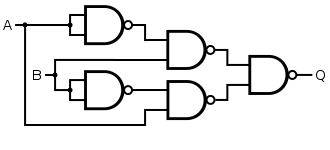